Universidad Torcuato Di Tella

Metodos computacionales\
**Trabajo Práctico 1:
Resoluciones Numéricas de Ecuaciones Diferenciales**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import csv

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
TP1 - Parte 2: Ecuación de transporte 1D
u_t = a u_x, u(x,0) = f(x)
Solución por características: u(x,t) = f(x - a t)
Genera CSVs y GIFs para a ∈ {0.5, 1.0, -0.5}, dx=0.01, dt=0.005, T=0.1
"""



DX_DEFAULT, DT_DEFAULT, T_DEFAULT = 0.01, 0.005, 0.1
A_VALUES_DEFAULT = [0.5, 1.0, -0.5]

def f_sinpi(x: np.ndarray) -> np.ndarray:
    return np.sin(np.pi * x)

def transport_exact(a: float, f, dx: float, dt: float, T: float):
    N  = int(round(1.0/dx)); x = np.linspace(0.0, 1.0, N+1)
    Nt = int(round(T/dt));   t = np.linspace(0.0, T, Nt+1)
    U  = np.zeros((Nt+1, N+1))
    for n in range(Nt+1):
        U[n, :] = f(x - a * t[n])
    return U, x, t

def save_matrix_csv(path: str, U, x, t) -> None:
    header = ["t"] + [f"x={xi:.2f}" for xi in x]
    with open(path, "w", newline="", encoding="utf-8") as f:
        w = csv.writer(f); w.writerow(header)
        for i in range(len(t)):
            row = [f"{t[i]:.6f}"] + [f"{val:.8f}" for val in U[i, :]]
            w.writerow(row)

def make_gif_transport(path: str, x, U, a: float, dx: float, dt: float) -> None:
    fig, ax = plt.subplots(figsize=(6, 4))
    (line,) = ax.plot(x, U[0, :], label=f"a={a}")
    ax.set_xlabel("x"); ax.set_ylabel("u(x,t)")
    ax.legend(loc="best")
    ax.set_xlim(0.0, 1.0)
    ymin, ymax = float(U.min()), float(U.max())
    pad = 0.05 * (ymax - ymin if ymax > ymin else 1.0)
    ax.set_ylim(ymin - pad, ymax + pad)
    Nt = U.shape[0] - 1
    def update(k):
        line.set_ydata(U[k, :])
        ax.set_title(f"Transporte 1D (a={a}, dx={dx}, dt={dt}) frame {k}/{Nt}")
        return (line,)
    ani = FuncAnimation(fig, update, frames=Nt+1, interval=30, blit=True)
    ani.save(path, writer=PillowWriter(fps=30))
    plt.close(fig)

def main(a_values=None, dx: float = DX_DEFAULT, dt: float = DT_DEFAULT, T: float = T_DEFAULT):
    if a_values is None:
        a_values = A_VALUES_DEFAULT
    for a in a_values:
        U, x, t = transport_exact(a, f_sinpi, dx, dt, T)
        csv_path = f"U_transport_a{str(a).replace('.', '_').replace('-', 'm')}.csv"
        gif_path = f"transport_a{str(a).replace('.', '_').replace('-', 'm')}.gif"
        save_matrix_csv(csv_path, U, x, t)
        make_gif_transport(gif_path, x, U, a, dx, dt)
        print(f"[OK] a={a:>4}: {csv_path} | {gif_path}")

if __name__ == "__main__":
    main()


[OK] a= 0.5: U_transport_a0_5.csv | transport_a0_5.gif
[OK] a= 1.0: U_transport_a1_0.csv | transport_a1_0.gif
[OK] a=-0.5: U_transport_am0_5.csv | transport_am0_5.gif


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def condicion_inicial(x):
    if 0 <= x and x <= 1:
        return np.sin(np.pi * x)
    else:
        print("x tiene que tenr un valor entre 0 y 1")
                       


def e_t_metodoexplicito(alpha, funcion, dx, dt, T):
    N  = int(round(1.0/dx))
    M = int(round(T/dt))
    x = np.arange(0, 1+dx, dx, dtype = float)
    t = np.arange(0, T+dt, dt, dtype = float)
    matriz_u = np.zeros((M+1, N+1), dtype = float)

    r  = alpha * dt / dx
    y = np.zeros(N+1)
    for pos in range(N+1):
        y[pos] =funcion(x[pos]) 
    matriz_u[0, :] = y # la primero fila se llena con la condicion inicial
    A = np.zeros((N+1, N+1))
    for a in range(1, N+1):
        A[a, a] = 1 - r
        A[a, a-1] = r

    for i in range(M): #las filas 
        x_vec = matriz_u[i, :] #b es la fila i seleccionando todos los elementos excepto el primer elmento  y el ultimo por las condiciones de borde 
        b = A.dot(x_vec) #A*x
        matriz_u[i+1, :] = b
    return matriz_u, x, t, y

def e_t_metodoimplicito(alpha, funcion, dx, dt, T):
    N  = int(round(1.0/dx))
    M = int(round(T/dt))
    x = np.arange(0, 1+dx, dx, dtype = float)
    t = np.arange(0, T+dt, dt, dtype = float)
    matriz_u = np.zeros((M+1, N+1), dtype = float)

    r  = alpha * dt / dx
    y = np.zeros(N+1)
    for pos in range(N+1):
        y[pos] =funcion(x[pos]) 
    matriz_u[0, :] = y # la primero fila se llena con la condicion inicial
    A = np.zeros((N+1, N+1))
    for a in range(1, N+1):
        A[a, a] = 1 + r
        A[a, a-1] = -r
    A[0,0] = 1 
    for n in range(M): #las filas 
        b = matriz_u[n, :] #b es la fila n seleccionando todos los elementos excepto el primer elmento  y el ultimo por las condiciones de borde 
        matriz_u[n+1, :] = np.linalg.solve(A, b) #resuelve la ecuacion lineal 
        
    return matriz_u, x, t, y

In [18]:
alpha = 1.0
dx    = 0.01
dt    = 0.005
T     = 0.1
# Cálculo
U_e, x_e, t_e, y_e = e_t_metodoexplicito(alpha, condicion_inicial, dx, dt, T)
U_i, x_i, t_i, y_i= e_t_metodoimplicito(alpha, condicion_inicial, dx, dt, T)


In [16]:
from matplotlib.animation import FuncAnimation, PillowWriter

def crear_gif(alpha, funcion, dx, dt, T, nombre_gif):
    u_ex, x_e, t_e, y_e = e_t_metodoexplicito(alpha, funcion, dx, dt, T)
    u_im, x_i, t_i, y_i= e_t_metodoimplicito(alpha, funcion, dx, dt, T)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    
    # Líneas iniciales
    line_ex, = ax1.plot(x_e, u_ex[0, :], color='blue')
    ax1.set_title("Método Explícito")
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1.1*np.max(u_ex))
    ax1.set_xlabel("x")
    ax1.set_ylabel("u(x,t)")
    ax1.grid(True)

    line_im, = ax2.plot(x_i, u_im[0, :], color='red')
    ax2.set_title("Método Implícito")
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1.1*np.max(u_ex))
    ax2.set_xlabel("x")
    ax2.set_ylabel("u(x,t)")
    ax2.grid(True)

    # Función que actualiza cada frame
    def actualizar(frame):
        line_ex.set_ydata(u_ex[frame, :])
        ax1.set_title(f"Método Explícito t={t_e[frame]:.3f}")
        line_im.set_ydata(u_im[frame, :])
        ax2.set_title(f"Método Implícito t={t_i[frame]:.3f}")
        return line_ex, line_im

    anim = FuncAnimation(fig, actualizar, frames=len(t_e), interval=100, blit=True)
    anim.save(nombre_gif, writer=PillowWriter(fps=10))
    print(f"GIF guardado como {nombre_gif}")



GIF guardado como ecuTransmetodo_ex_vs_im.gif


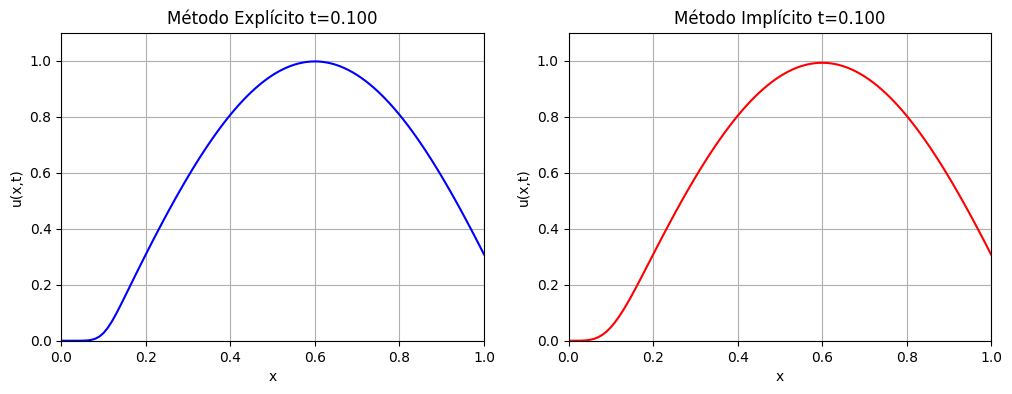

In [19]:
crear_gif(alpha, condicion_inicial, dx, dt, T, "ecuTransmetodo_ex_vs_im.gif")
